## **DIABETES 130-US HOSPITALS FOR YEARS 1999-2008 DATA SET** 


Data Set Information:

The dataset represents 10 years (1999-2008) of clinical care at 130 US hospitals and integrated
delivery networks. It includes over 50 features representing patient and hospital outcomes.
Information was extracted from the database for encounters that satisfied the following criteria.

* It is an inpatient encounter (a hospital admission).

* It is a diabetic encounter, that is, one during which any kind of diabetes was entered to the system
as a diagnosis.

* The length of stay was at least 1 day and at most 14 days.

* Laboratory tests were performed during the encounter.

* Medications were administered during the encounter.

The data contains such attributes as patient number, race, gender, age, admission type, time in
hospital, medical specialty of admitting physician, number of lab test performed, HbA1c test
result, diagnosis, number of medication, diabetic medications, number of outpatient, inpatient,
and emergency visits in the year before the hospitalization, etc.

## Project Goal
To predict whether a patient is likely to be a readmit in the
hospital within 30days.

# Exploratory Data Analysis(EDA)

In [236]:
# import libraries 
import pandas as pd # Import Pandas for data manipulation using dataframes
import numpy as np # Import Numpy for data statistical analysis 
import matplotlib.pyplot as plt # Import matplotlib for data visualisation
import seaborn as sns # Statistical data visualization
# %matplotlib inline


#import the data set
diabetes_df = pd.read_csv('https://raw.githubusercontent.com/negojovanovich3/pythonprojects/main/diabetic_data.csv')

## Information about Data

In [237]:
diabetes_df.head() # a glance at dataset

,encounter_id,patient_nbr,race,gender,age,weight,admission_type_id,discharge_disposition_id,admission_source_id,time_in_hospital,payer_code,medical_specialty,num_lab_procedures,num_procedures,num_medications,number_outpatient,number_emergency,number_inpatient,diag_1,diag_2,diag_3,number_diagnoses,max_glu_serum,A1Cresult,metformin,repaglinide,nateglinide,chlorpropamide,glimepiride,acetohexamide,glipizide,glyburide,tolbutamide,pioglitazone,rosiglitazone,acarbose,miglitol,troglitazone,tolazamide,examide,citoglipton,insulin,glyburide-metformin,glipizide-metformin,glimepiride-pioglitazone,metformin-rosiglitazone,metformin-pioglitazone,change,diabetesMed,readmitted
0,2278392,8222157,Caucasian,Female,[0-10),?,6,25,1,1,?,Pediatrics-Endocrinology,41,0,1,0,0,0,250.83,?,?,1,None,None,No,No,No,No,No,No,No,No,No,No,No,No,No,No,No,No,No,No,No,No,No,No,No,No,No,NO
1,149190,55629189,Caucasian,Female,[10-20),?,1,1,7,3,?,?,59,0,18,0,0,0,276,250.01,255,9,None,None,No,No,No,No,No,No,No,No,No,No,No,No,No,No,No,No,No,Up,No,No,No,No,No,Ch,Yes,>30
2,64410,86047875,AfricanAmerican,Female,[20-30),?,1,1,7,2,?,?,11,5,13,2,0,1,648,250,V27,6,None,None,No,No,No,No,No,No,Steady,No,No,No,No,No,No,No,No,No,No,No,No,No,No,No,No,No,Yes,NO
3,500364,82442376,Caucasian,Male,[30-40),?,1,1,7,2,?,?,44,1,16,0,0,0,8,250.43,403,7,None,None,No,No,No,No,No,No,No,No,No,No,No,No,No,No,No,No,No,Up,No,No,No,No,No,Ch,Yes,NO
4,16680,42519267,Caucasian,Male,[40-50),?,1,1,7,1,?,?,51,0,8,0,0,0,197,157,250,5,None,None,No,No,No,No,No,No,Steady,No,No,No,No,No,No,No,No,No,No,Steady,No,No,No,No,No,Ch,Yes,NO


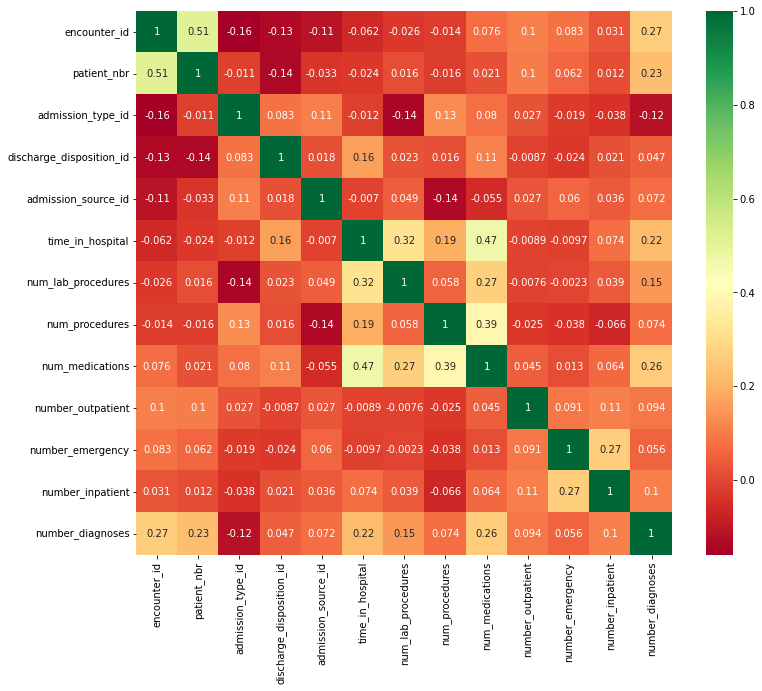

In [238]:
plt.figure(figsize=(12,10))
# To show heatmap using seaborn
plot1 = sns.heatmap(diabetes_df.corr(), annot=True,cmap ='RdYlGn')

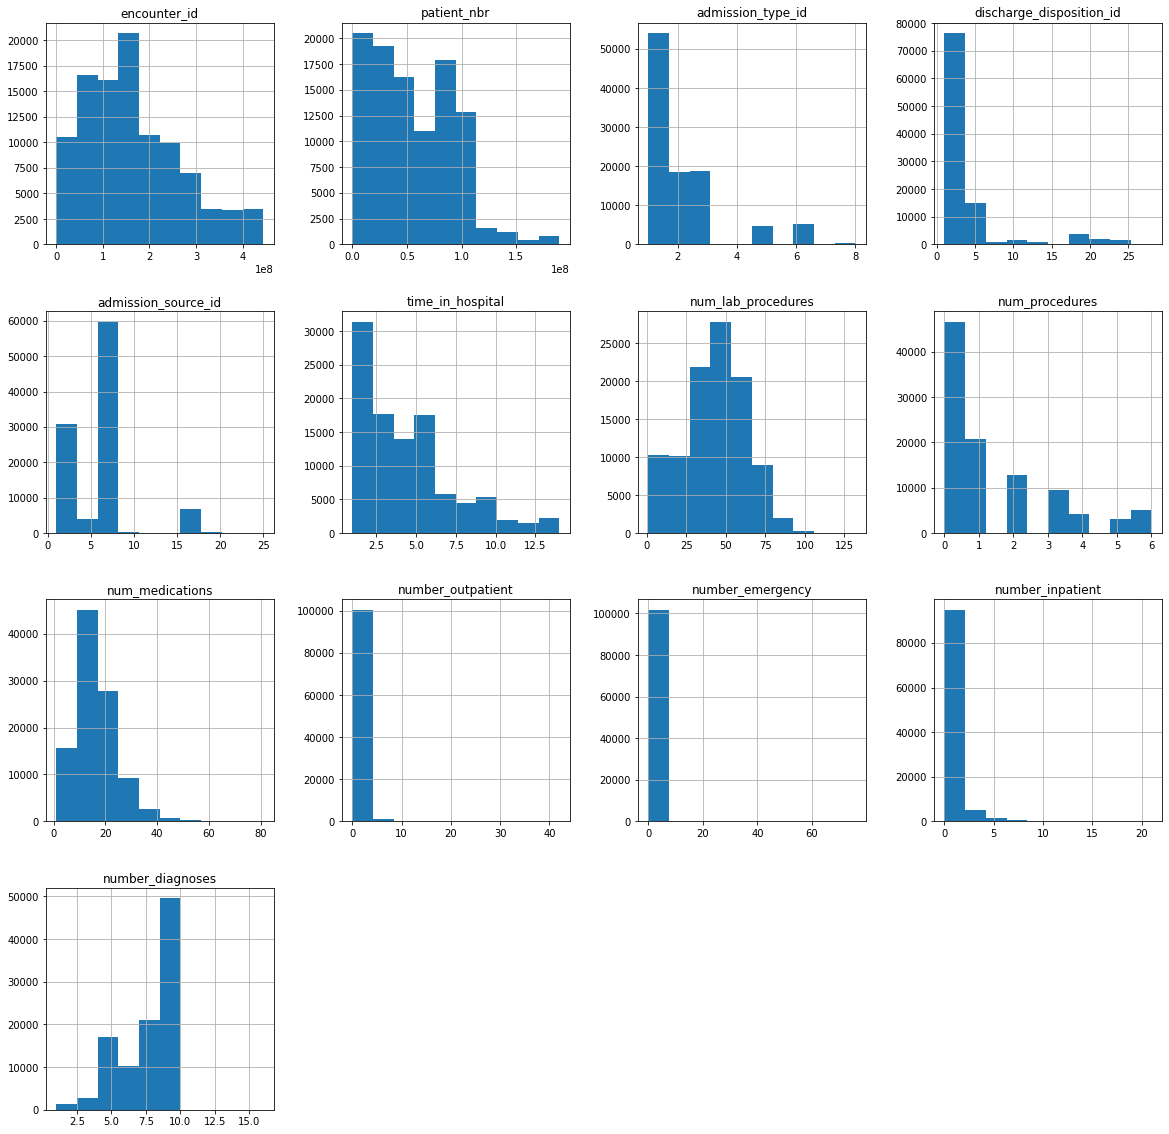

In [239]:
plot2 = diabetes_df.hist(figsize = (20,20))

In [240]:
diabetes_df.columns

Index(['encounter_id', 'patient_nbr', 'race', 'gender', 'age', 'weight',
       'admission_type_id', 'discharge_disposition_id', 'admission_source_id',
       'time_in_hospital', 'payer_code', 'medical_specialty',
       'num_lab_procedures', 'num_procedures', 'num_medications',
       'number_outpatient', 'number_emergency', 'number_inpatient', 'diag_1',
       'diag_2', 'diag_3', 'number_diagnoses', 'max_glu_serum', 'A1Cresult',
       'metformin', 'repaglinide', 'nateglinide', 'chlorpropamide',
       'glimepiride', 'acetohexamide', 'glipizide', 'glyburide', 'tolbutamide',
       'pioglitazone', 'rosiglitazone', 'acarbose', 'miglitol', 'troglitazone',
       'tolazamide', 'examide', 'citoglipton', 'insulin',
       'glyburide-metformin', 'glipizide-metformin',
       'glimepiride-pioglitazone', 'metformin-rosiglitazone',
       'metformin-pioglitazone', 'change', 'diabetesMed', 'readmitted'],
      dtype='object')

# Data Cleaning and Data Wrangling 

In [241]:
diabetes_df_copy = diabetes_df.copy(deep = True) #create a new copy of dataset

drop_columns_list = ['encounter_id','patient_nbr','admission_type_id','discharge_disposition_id', 
                     'admission_source_id', 'payer_code', 'medical_specialty','number_outpatient',
                     'number_inpatient', 'diag_1','diag_2', 'diag_3', 'weight', 'race', 'age',
                     'max_glu_serum', 'A1Cresult', 'metformin', 'repaglinide', 'nateglinide', 'chlorpropamide',
                     'glimepiride', 'acetohexamide', 'glipizide', 'glyburide', 'tolbutamide',
                     'pioglitazone', 'rosiglitazone', 'acarbose', 'miglitol', 'troglitazone',
                     'tolazamide', 'examide', 'citoglipton','glyburide-metformin', 
                     'glipizide-metformin','glimepiride-pioglitazone', 'metformin-rosiglitazone',
                     'metformin-pioglitazone','change', 'insulin']

diabetes_df_copy.drop(drop_columns_list, axis=1, inplace=True)

diabetes_df_copy.tail(100)

,gender,time_in_hospital,num_lab_procedures,num_procedures,num_medications,number_emergency,number_diagnoses,diabetesMed,readmitted
101666,Female,4,10,1,5,0,9,Yes,NO
101667,Male,4,37,0,7,0,5,Yes,<30
101668,Male,2,28,0,13,0,9,Yes,NO
101669,Male,2,50,0,7,0,4,No,NO
101670,Male,4,40,2,13,0,9,Yes,NO
...,...,...,...,...,...,...,...,...,...
101761,Male,3,51,0,16,0,9,Yes,>30
101762,Female,5,33,3,18,0,9,Yes,NO
101763,Male,1,53,0,9,0,13,Yes,NO
101764,Female,10,45,2,21,0,9,Yes,NO


## Changing all the values in the dataset to numerical values

* In 'gender' column, 'Male' will be 1 and 'Female' will be 0.
* In 'diabetesMed' column, 'Yes' will be 1 and 'No' will be 0.
* In 'readmitted' column, '<30' will be 1 and '>30' or 'NO' will be 0.

In [242]:
diabetes_df_copy['gender'] = diabetes_df_copy['gender'].map({'Male':1, 'Female':0}) #using map method
diabetes_df_copy['diabetesMed'] = diabetes_df_copy['diabetesMed'].map({'Yes': 1, 'No': 0}) #using map method
diabetes_df_copy['readmitted'] = diabetes_df_copy['readmitted'].apply(lambda x: 1 if x=='<30' else 0) #using lambda since readmitted has 3 unique values "<30", ">30" and "NO"

Check the data has NULL values

In [243]:
diabetes_df_copy.isnull().sum()

gender                3
time_in_hospital      0
num_lab_procedures    0
num_procedures        0
num_medications       0
number_emergency      0
number_diagnoses      0
diabetesMed           0
readmitted            0
dtype: int64

Dropping Null values from Gender Column

In [244]:
diabetes_df_copy = diabetes_df_copy.dropna(how='any',axis=0) 
diabetes_df_copy.isnull().sum()

gender                0
time_in_hospital      0
num_lab_procedures    0
num_procedures        0
num_medications       0
number_emergency      0
number_diagnoses      0
diabetesMed           0
readmitted            0
dtype: int64

# Model Creation

In [245]:
from sklearn.model_selection import train_test_split

In [246]:
X = diabetes_df_copy[['gender','time_in_hospital','num_lab_procedures','num_procedures','num_medications','number_emergency', 'number_diagnoses', 'diabetesMed']]
Y = diabetes_df_copy['readmitted']

X_train, X_test, Y_train, Y_test = train_test_split(X, Y, random_state=1)

## Using KNN Algorithm

In [247]:
from sklearn.neighbors import KNeighborsClassifier

knn = KNeighborsClassifier(n_neighbors=3)
knn.fit(X_train, Y_train)

KNeighborsClassifier(n_neighbors=3)

### Testing with Train Dataset

In [248]:
from sklearn import metrics

knn_train = knn.predict(X_train)

print("Accuracy_Score of KNN classifier on train set: ", format(metrics.accuracy_score(Y_train, knn_train)))

Accuracy_Score of KNN classifier on train set:  0.9014831896438773


### Testing with Test Dataset

In [249]:
knn_test = knn.predict(X_test)

print("Accuracy_Score of KNN classifier on test set: ", format(metrics.accuracy_score(Y_test, knn_test)))

Accuracy_Score of KNN classifier on test set:  0.8610117526826776


### Classification report and confusion matrix of random forest model

In [250]:
from sklearn.metrics import classification_report, confusion_matrix

print(confusion_matrix(Y_test, knn_test))
print(classification_report(Y_test, knn_test))

[[21787   808]
 [ 2728   118]]
              precision    recall  f1-score   support

           0       0.89      0.96      0.92     22595
           1       0.13      0.04      0.06      2846

    accuracy                           0.86     25441
   macro avg       0.51      0.50      0.49     25441
weighted avg       0.80      0.86      0.83     25441



## Using Random Forest Algorithm

In [251]:
from sklearn.ensemble import RandomForestClassifier

rfc = RandomForestClassifier(n_estimators=200)
rfc.fit(X_train, Y_train)

RandomForestClassifier(n_estimators=200)

### Testing with Train Dataset

In [252]:
from sklearn import metrics

rfc_train = rfc.predict(X_train)

print("Accuracy_Score of Random Forest classifier on train set: ", format(metrics.accuracy_score(Y_train, rfc_train)))

Accuracy_Score of Random Forest classifier on train set:  0.9863997274704541


### Testing with Test Dataset

In [253]:
rfc_test = rfc.predict(X_test)

print("Accuracy_Score of Random Forest classifier on test set: ", format(metrics.accuracy_score(Y_test, rfc_test)))

Accuracy_Score of Random Forest classifier on test set:  0.8728430486223026


### Classification report and confusion matrix of random forest model

In [254]:
from sklearn.metrics import classification_report, confusion_matrix

print(confusion_matrix(Y_test, rfc_test))
print(classification_report(Y_test, rfc_test))

[[22136   459]
 [ 2776    70]]
              precision    recall  f1-score   support

           0       0.89      0.98      0.93     22595
           1       0.13      0.02      0.04      2846

    accuracy                           0.87     25441
   macro avg       0.51      0.50      0.49     25441
weighted avg       0.80      0.87      0.83     25441



## Using Decision Tree Algorithm

In [255]:
from sklearn.tree import DecisionTreeClassifier

dtree = DecisionTreeClassifier()
dtree.fit(X_train, Y_train)

DecisionTreeClassifier()

### Testing with Train Dataset

In [256]:
from sklearn import metrics

dtree_train = dtree.predict(X_train)
print("Accuracy Score of Decision Tree on train set: ", format(metrics.accuracy_score(Y_train,dtree_train)))

Accuracy Score of Decision Tree on train set:  0.9863997274704541


### Testing with Test Dataset

In [257]:
dtree_test = dtree.predict(X_test)
print("Accuracy Score of Decision Tree on test set: ", format(metrics.accuracy_score(Y_test,dtree_test)))

Accuracy Score of Decision Tree on test set:  0.793600880468535


### Classification report and confusion matrix of random forest model

In [258]:
from sklearn.metrics import classification_report, confusion_matrix

print(confusion_matrix(Y_test, dtree_test))
print(classification_report(Y_test,dtree_test))

[[19787  2808]
 [ 2443   403]]
              precision    recall  f1-score   support

           0       0.89      0.88      0.88     22595
           1       0.13      0.14      0.13      2846

    accuracy                           0.79     25441
   macro avg       0.51      0.51      0.51     25441
weighted avg       0.80      0.79      0.80     25441



## Result



*   KNN : 86.1% accurancy
*   Random Forest: 87.2% accurancy
*   Decision Tree: 79.7% accurancy



## Testing with Random data using Random Forest Algorithm

In [259]:
#Patient 1 data
# Female 	1 	41 	0 	1 	0 	1 	No 	NO
Patient_1 = [[0,1,41,0,1,0,1,0]] 

In [260]:
rfc.predict(Patient_1)

/usr/local/lib/python3.7/dist-packages/sklearn/base.py:451: UserWarning: X does not have valid feature names, but RandomForestClassifier was fitted with feature names
  "X does not have valid feature names, but"


array([0])

Array([0])
means that the patient 1 will not likely to readmit the hospital within 30 days.
This is a correct prediction.


In [261]:
# Patient 101667
# 101667 	Male 	4 	37 	0 	7 	0 	5 	Yes
Patient_101667 = [[1,4,37,0,7,0,5,1]]

In [262]:
rfc.predict(Patient_101667)

/usr/local/lib/python3.7/dist-packages/sklearn/base.py:451: UserWarning: X does not have valid feature names, but RandomForestClassifier was fitted with feature names
  "X does not have valid feature names, but"


array([1])

Array([1]) means that the patient 101667 will likely to readmit the hospital within 30 days. This is a correct prediction.

## In conclusion, Random Forest Algorithm gives the right predictions with 87% accurancy.